In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import io
import sys

In [2]:
data_frame = pd.read_csv("Fentanyl_States.txt",delimiter="\t")

We replace "Unreliable" by NaN.

In [3]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)

In [4]:
data_frame[(data_frame["State"] == "Alabama")]

,Notes,State,State Code,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,2013.0,2013.0,30,4833722.0,0.6
1,NaN,Alabama,1.0,2014.0,2014.0,47,4849377.0,1.0
2,NaN,Alabama,1.0,2015.0,2015.0,70,4858979.0,1.4
3,NaN,Alabama,1.0,2016.0,2016.0,157,4863300.0,3.2
4,NaN,Alabama,1.0,2017.0,2017.0,198,4874747.0,4.1
5,NaN,Alabama,1.0,2018.0,2018.0,147,4887871.0,3.0
6,NaN,Alabama,1.0,2019.0,2019.0,213,4903185.0,4.3
7,NaN,Alabama,1.0,2020.0,2020.0,442,4921532.0,9.0


In [5]:
#nonviable =[Alaska, Hawaii, Montana, North Dakota, South Dakota, Wyoming]

C_Fent0 = data_frame[(data_frame["State"] == "California") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 
C_Fent1 = data_frame[(data_frame["State"] == "California") & (data_frame["Year"] != 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 
C20_Fent1 = data_frame[(data_frame["State"] == "California") & (data_frame["Year"] == 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)

In [6]:
y_fent1 = C_Fent1["Crude Rate"]
x_fent0 = C_Fent0["Year"]
x_fent1 = C_Fent1["Year"][y_fent1.notna()]
y_fent1 = y_fent1.dropna()


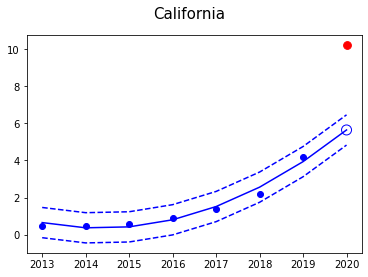

In [7]:
coeff1 = np.polyfit(x_fent1, y_fent1, 2)
yfit1 = np.polyval(coeff1,x_fent1)
res1 = np.sum((y_fent1  - yfit1)**2)

std1 = np.sqrt(res1/(len(y_fent1)-3))
#std1 = np.sqrt(res1/5)

plt.suptitle('California', fontsize=15)
plt.plot(x_fent0, np.polyval(coeff1,x_fent0), color='blue')
plt.scatter(x_fent1, y_fent1, color='blue')
plt.scatter(2020.0, C20_Fent1["Crude Rate"], s=60, color='red')
plt.scatter(2020.0, np.polyval(coeff1, 2020), s=100, edgecolors='blue', facecolors='none')
plt.plot(x_fent0, np.polyval(coeff1,x_fent0)+3*std1, color='blue', linestyle='dashed')
plt.plot(x_fent0, np.polyval(coeff1,x_fent0)-3*std1, color='blue', linestyle='dashed')

In [8]:
states = data_frame["State"]

statelist = []
for y in states:
    [statelist.append(y) for y in states if y not in statelist]

length = len(statelist)

middle_index = length // 3

first_half = statelist[:middle_index]
second_half = statelist[middle_index: 2*middle_index]
third_half = statelist[2*middle_index +1 : length-1 ]

#print(first_half)
#print(second_half)
#print(third_half)

#non_viable = [Alaska, Hawaii, Montana, Nebraska, North Dakota, South Dakota, Wyoming]
m_first_half = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
                'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas']
m_second_half = ['Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 
                 'Minnesota', 'Mississippi', 'Missouri', 'Nevada', 'New Hampshire', 
                 'New Jersey', 'New Mexico', 'New York', 'North Carolina']
m_third_half = ['Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 
                'Texas','Utah', 'Vermont', 'Virginia', 'Washington', 
                'West Virginia', 'Wisconsin']

Ohio  29.725449
Oklahoma  127.350427
Oregon  89.099526
Pennsylvania  3.923648
Rhode Island  54.931836
South Carolina  58.110883
Tennessee  39.726027
Texas  115.384615
Utah  59.241706
Vermont  14.822547
Virginia  44.750795
Washington  49.152542
West Virginia  65.439093
Wisconsin  26.647001


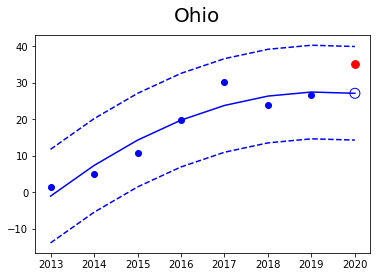

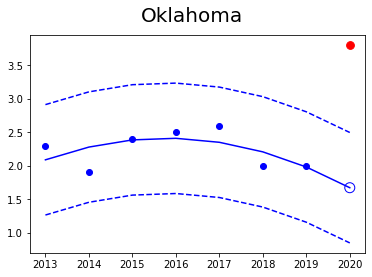

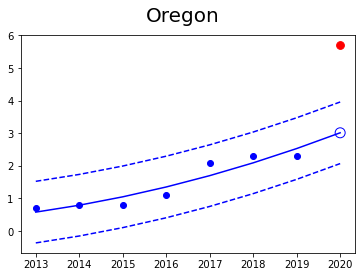

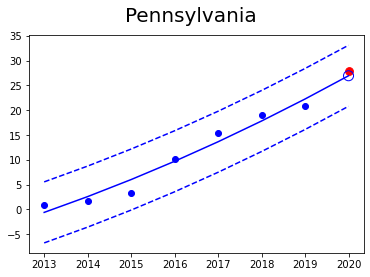

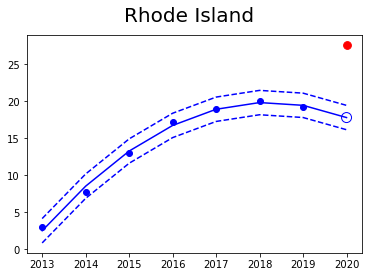

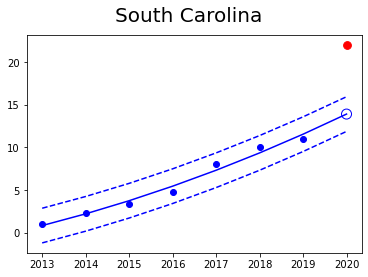

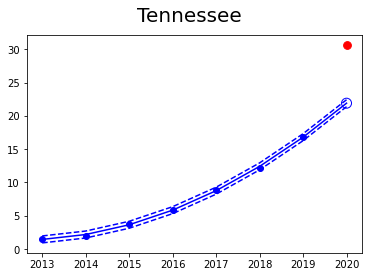

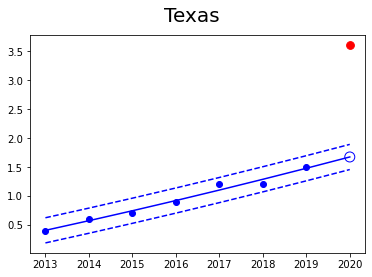

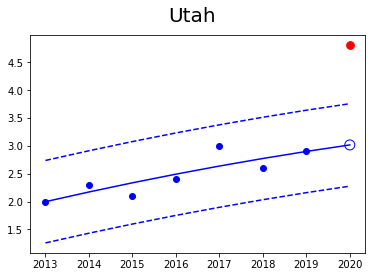

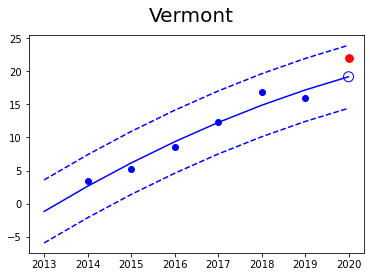

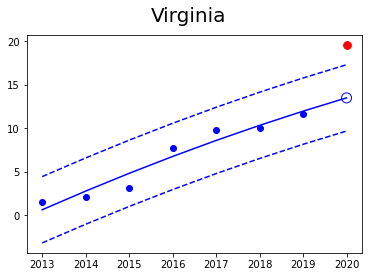

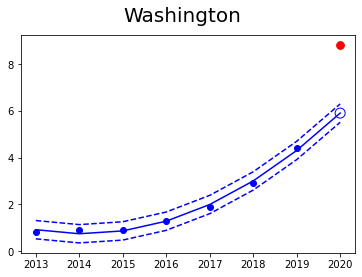

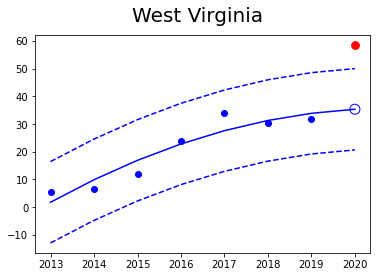

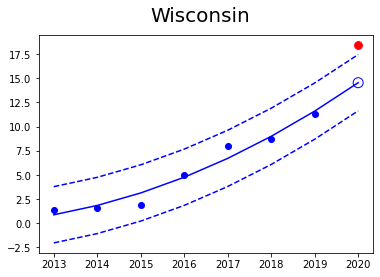

<Figure size 432x288 with 0 Axes>

In [9]:
for x in m_third_half:

    C_Fent0 = data_frame[(data_frame["State"] == x) &
        (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
    C_Fent1 = data_frame[(data_frame["State"] == x) & (data_frame["Year"] != 2020) &
        (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 
    C20_Fent1 = data_frame[(data_frame["State"] == x) & (data_frame["Year"] == 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
    
    y_fent1 = C_Fent1["Crude Rate"]
    x_fent0 = C_Fent0["Year"]
    x_fent1 = C_Fent1["Year"][y_fent1.notna()]
    y_fent1 = y_fent1.dropna()
    coeff1 = np.polyfit(x_fent1, y_fent1, 2)
    yfit1 = np.polyval(coeff1,x_fent1)
    res1 = np.sum((y_fent1  - yfit1)**2)

    #std1 = np.sqrt(res1/5)
    std1 = np.sqrt(res1/(len(y_fent1)-3))

    plt.suptitle(x, fontsize=20)
    plt.plot(x_fent0, np.polyval(coeff1,x_fent0), color='blue')
    plt.scatter(x_fent1, y_fent1, color='blue')
    plt.scatter(2020.0, C20_Fent1["Crude Rate"], s=60, color='red')
    plt.scatter(2020.0, np.polyval(coeff1, 2020), s=100, edgecolors='blue', facecolors='none')
    plt.plot(x_fent0, np.polyval(coeff1,x_fent0)+3*std1, color='blue', linestyle='dashed')
    plt.plot(x_fent0, np.polyval(coeff1,x_fent0)-3*std1, color='blue', linestyle='dashed')  
    str1 = x
    str2 ='_Fent'
    str3 = '.pdf'
    strtot = str1 + str2 + str3
    plt.savefig(str(strtot)) 
    plt.figure()
    diff = (C20_Fent1["Crude Rate"] - np.polyval(coeff1, 2020)) / np.polyval(coeff1, 2020)*100
    print(x, diff.to_string(index=False))
    print(x, diff.to_string(index=False), file=open('output.txt', 'a'))
    #with open('filename.txt', 'w') as f:
    #    sys.stdout = f # Change the standard output to the file we created.
    #    print(x, diff.to_string(index=False))
    #    sys.stdout = original_stdout # Reset the standard output to its original value

In [10]:
from matplotlib import rcParams

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'DejaVu Sans',
    'font.size': 6,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 700 # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * ratio  # height in inches
fig_size = [fig_width, 7/8*fig_height]
rcParams.update({'figure.figsize': fig_size})

<ipython-input-11-b7d8e16b2507>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  statelist = [x for x in statelist if x not in exclude]


0 0 Alabama
0 1 Arizona
0 2 Arkansas
0 3 California
0 4 Colorado
0 5 Connecticut
0 6 Delaware
1 0 District of Columbia
1 1 Florida
1 2 Georgia
1 3 Idaho
1 4 Illinois
1 5 Indiana
1 6 Iowa
2 0 Kansas
2 1 Kentucky
2 2 Louisiana
2 3 Maine
2 4 Maryland
2 5 Massachusetts
2 6 Michigan
3 0 Minnesota
3 1 Mississippi
3 2 Missouri
3 3 Nevada
3 4 New Hampshire
3 5 New Jersey
3 6 New Mexico
4 0 New York
4 1 North Carolina
4 2 Ohio
4 3 Oklahoma
4 4 Oregon
4 5 Pennsylvania
4 6 Rhode Island
5 0 South Carolina
5 1 Tennessee
5 2 Texas
5 3 Utah
5 4 Vermont
5 5 Virginia
5 6 Washington
6 0 West Virginia
6 1 Wisconsin


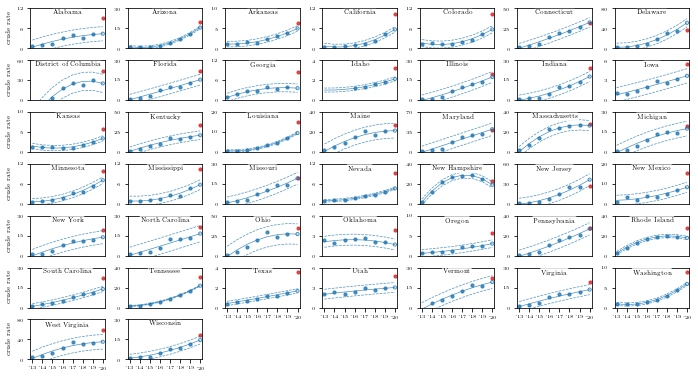

In [11]:
ncols=7
nrows=7

fig, ax = plt.subplots(ncols=ncols,nrows=nrows)
fig.patch.set_facecolor('white')
exclude = np.array(["Alaska", "Hawaii", "Montana", "Nebraska", "North Dakota", "South Dakota", "Wyoming"])
statelist = [x for x in statelist if x not in exclude]

for i in range(len(statelist[:-1])):
    x = statelist[i]
    C_Fent0 = data_frame[(data_frame["State"] == x) &
        (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
    C_Fent1 = data_frame[(data_frame["State"] == x) & (data_frame["Year"] != 2020) &
        (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 
    C20_Fent1 = data_frame[(data_frame["State"] == x) & (data_frame["Year"] == 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
    
    y_fent1 = C_Fent1["Crude Rate"]
    x_fent0 = C_Fent0["Year"]
    x_fent1 = C_Fent1["Year"][y_fent1.notna()]
    y_fent1 = y_fent1.dropna()

    if len(y_fent1):
        coeff1 = np.polyfit(x_fent1, y_fent1, 2)
        yfit1 = np.polyval(coeff1,x_fent1)
        res1 = np.sum((y_fent1  - yfit1)**2)

        #std1 = np.sqrt(res1/5)
        std1 = np.sqrt(res1/(len(y_fent1)-3))

        ii = i//ncols
        jj = i%ncols
        print(ii,jj,x)

        ymin = np.floor(0.8*min(np.polyval(coeff1,x_fent0)-3*std1))
        ymax = np.ceil(1.2*max(np.append(np.polyval(coeff1,x_fent0)+3*std1,float(C20_Fent1["Crude Rate"]))))
        #ax[ii,jj].suptitle(x, fontsize=20)
        text = ax[ii,jj].text(0.5, 0.88, x, horizontalalignment='center', verticalalignment='center', transform = ax[ii,jj].transAxes,\
                             bbox=dict(facecolor='white', edgecolor='white',alpha=0.8, boxstyle='round,pad=0.2'))

        ax[ii,jj].plot(x_fent0, np.polyval(coeff1,x_fent0), color='tab:blue',lw=0.7,alpha=0.8)
        ax[ii,jj].scatter(x_fent1, y_fent1, s=10, color='tab:blue',alpha=0.8)
        ax[ii,jj].scatter(2020.0, C20_Fent1["Crude Rate"], s=10, color='tab:red',alpha=0.8)
        ax[ii,jj].scatter(2020.0, np.polyval(coeff1, 2020), s=10, edgecolors='tab:blue', facecolors='none',alpha=0.8)
        ax[ii,jj].plot(x_fent0, np.polyval(coeff1,x_fent0)+3*std1, color='tab:blue', linestyle='dashed',lw=0.7,alpha=0.8)
        ax[ii,jj].plot(x_fent0, np.polyval(coeff1,x_fent0)-3*std1, color='tab:blue', linestyle='dashed',lw=0.7,alpha=0.8)  
        ax[ii,jj].set_xlim(2012.8,2020.2)
        ax[ii,jj].set_xticks([])
        ax[ii,jj].set_ylim(0,np.ceil(ymax/10)*10)
        ax[ii,jj].set_yticks(np.arange(0,np.ceil(ymax/10)*10+1,np.ceil(ymax/10)*10/2))

ax[0,0].set_ylim(0,12)
ax[0,0].set_yticks([0,6,12])
ax[0,3].set_ylim(0,12)
ax[0,3].set_yticks([0,6,12])
ax[0,4].set_ylim(0,12)
ax[0,4].set_yticks([0,6,12])
ax[1,2].set_ylim(0,12)
ax[1,2].set_yticks([0,6,12])
ax[1,3].set_ylim(0,4)
ax[1,3].set_yticks([0,2,4])
ax[1,6].set_ylim(0,6)
ax[1,6].set_yticks([0,3,6])
ax[3,0].set_ylim(0,12)
ax[3,0].set_yticks([0,6,12])
ax[3,1].set_ylim(0,12)
ax[3,1].set_yticks([0,6,12])
ax[3,3].set_ylim(0,12)
ax[3,3].set_yticks([0,6,12])
ax[4,3].set_ylim(0,6)
ax[4,3].set_yticks([0,3,6])
ax[5,2].set_ylim(0,4)
ax[5,2].set_yticks([0,2,4])
ax[5,3].set_ylim(0,6)
ax[5,3].set_yticks([0,3,6])
ax[5,6].set_ylim(0,10)
ax[5,6].set_yticks([0,5,10])

ax[0,0].set_ylabel(r"crude rate")
ax[1,0].set_ylabel(r"crude rate")
ax[2,0].set_ylabel(r"crude rate")
ax[3,0].set_ylabel(r"crude rate")
ax[4,0].set_ylabel(r"crude rate")
ax[5,0].set_ylabel(r"crude rate")
ax[6,0].set_ylabel(r"crude rate")

ax[5,2].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[5,2].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[5,3].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[5,3].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[5,4].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[5,4].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[5,5].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[5,5].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[5,6].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[5,6].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)

ax[6,0].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[6,0].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[6,1].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[6,1].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)

fig.delaxes(ax[6][2])
fig.delaxes(ax[6][3])
fig.delaxes(ax[6][4])
fig.delaxes(ax[6][5])
fig.delaxes(ax[6][6])

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig(r"fentanyl_states.png",dpi=480)
plt.show()